# Predicting Cancer Diagnosis

## Import the libraties

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as ply
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import itertools

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## Load Dataset

In [2]:
train=pd.read_csv('Dataset\kaggle_to_students-Train.csv')
test=pd.read_csv('Dataset\kaggle_prediction_features-Test.csv')

In [3]:
train.head()

,Patient,age,eventdeath,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,esr1
0,s157,45,0,7.874059,0,0,0,1,30,1,1,1,1,0.352512
1,s340,43,1,3.121150,1,0,0,1,22,1,2,1,1,0.425800
2,s292,48,0,8.366872,0,0,0,7,10,0,1,1,1,0.054635
3,s355,50,0,6.045175,0,0,0,1,14,0,2,1,1,-0.052160
4,s161,46,1,8.128679,1,0,1,2,40,9,1,2,1,-0.147207




###### 14 independent features and 1 dependent feature

###### Independent features : (X)
[Patient,age,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,esr1]
###### Dependent feature : (Y)
we have to predict the "eventdeath" due to cancer.


## Exploratory Data Analysis

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient         217 non-null    object 
 1   age             217 non-null    int64  
 2   eventdeath      217 non-null    int64  
 3   timerecurrence  217 non-null    float64
 4   chemo           217 non-null    int64  
 5   hormonal        217 non-null    int64  
 6   amputation      217 non-null    int64  
 7   histtype        217 non-null    int64  
 8   diam            217 non-null    int64  
 9   posnodes        217 non-null    int64  
 10  grade           217 non-null    int64  
 11  angioinv        217 non-null    int64  
 12  lymphinfil      217 non-null    int64  
 13  esr1            217 non-null    float64
dtypes: float64(2), int64(11), object(1)
memory usage: 23.9+ KB


As per the above information:
    
    Total record count is : 217
    No of null records : 0

In [5]:
# we can also confirm the null data with the below code

train.isnull().sum()

Patient           0
age               0
eventdeath        0
timerecurrence    0
chemo             0
hormonal          0
amputation        0
histtype          0
diam              0
posnodes          0
grade             0
angioinv          0
lymphinfil        0
esr1              0
dtype: int64

In [6]:
# The target value counts checking

train['eventdeath'].value_counts()

0    158
1     59
Name: eventdeath, dtype: int64

In [7]:
train.dtypes

Patient            object
age                 int64
eventdeath          int64
timerecurrence    float64
chemo               int64
hormonal            int64
amputation          int64
histtype            int64
diam                int64
posnodes            int64
grade               int64
angioinv            int64
lymphinfil          int64
esr1              float64
dtype: object

There is no categorical data.

In [8]:
# To find the unique values in each variable, we can use this code

for col in train.columns:
    print(col, '   :', len(train[col].unique()), 'labels')

Patient    : 217 labels
age    : 27 labels
eventdeath    : 2 labels
timerecurrence    : 210 labels
chemo    : 2 labels
hormonal    : 2 labels
amputation    : 2 labels
histtype    : 5 labels
diam    : 32 labels
posnodes    : 11 labels
grade    : 3 labels
angioinv    : 3 labels
lymphinfil    : 3 labels
esr1    : 217 labels


## Data Visualization

<AxesSubplot:xlabel='diam', ylabel='age'>

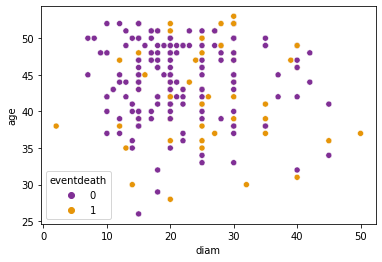

In [9]:
sns.scatterplot(x= 'diam', y= 'age', hue= 'eventdeath', data=train, palette='CMRmap')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

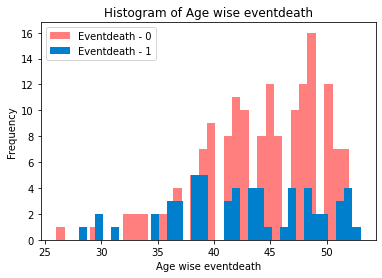

In [18]:
m = plt.hist(train[train["eventdeath"] == 0].age,bins=35,fc = (1,0,0,0.5),label = "Eventdeath - 0")
b = plt.hist(train[train["eventdeath"] == 1].age,bins=35, fc = (0,0.5,0.8), label = "Eventdeath - 1")

plt.legend()
plt.xlabel ("Age wise eventdeath")
plt.ylabel ("Frequency")
plt.title("Histogram of Age wise eventdeath")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

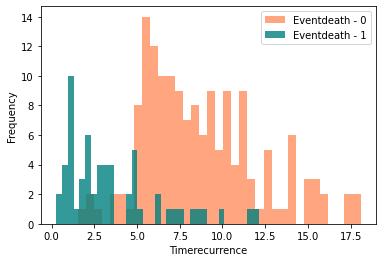

In [19]:
m = plt.hist(train[train["eventdeath"] == 0].timerecurrence,bins=35,fc = (1,0.3,0,0.5),label = "Eventdeath - 0")
b = plt.hist(train[train["eventdeath"] == 1].timerecurrence,bins=35, fc = (0,0.5,0.5,0.8), label = "Eventdeath - 1")

plt.legend()
plt.xlabel ("Timerecurrence")
plt.ylabel ("Frequency")
plt.show()

In [20]:
train.columns

Index(['Patient', 'age', 'eventdeath', 'timerecurrence', 'chemo', 'hormonal',
       'amputation', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv',
       'lymphinfil', 'esr1'],
      dtype='object')

In [21]:
new=train[['chemo', 'hormonal','amputation', 'histtype', 'posnodes', 'grade', 'angioinv','lymphinfil']]

In [16]:
def fn(feature):
    sns.countplot(x=feature,hue='eventdeath',data=train)
    plt.show()

<IPython.core.display.Javascript object>

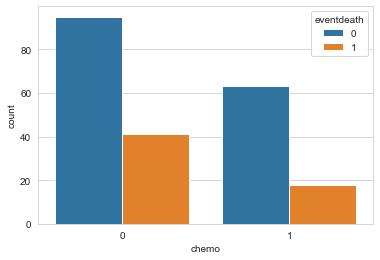

<IPython.core.display.Javascript object>

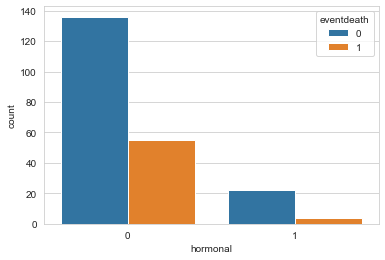

<IPython.core.display.Javascript object>

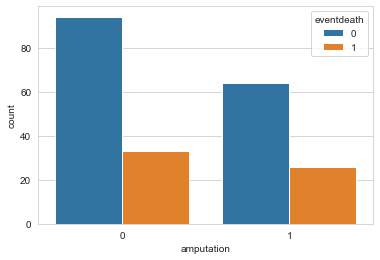

<IPython.core.display.Javascript object>

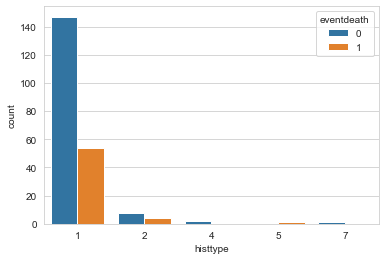

<IPython.core.display.Javascript object>

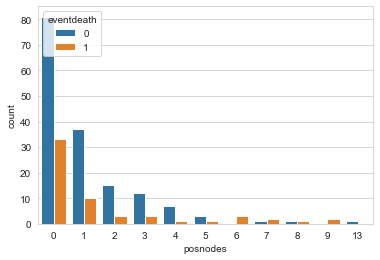

<IPython.core.display.Javascript object>

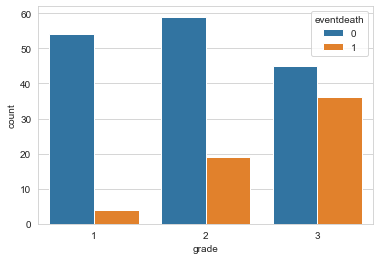

<IPython.core.display.Javascript object>

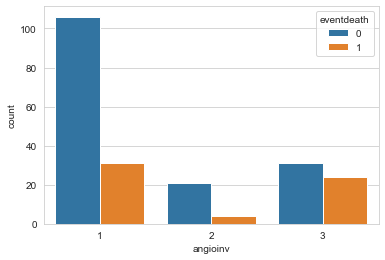

<IPython.core.display.Javascript object>

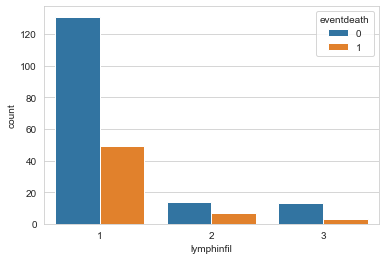

In [43]:
for i in new:
    fn(i)
    


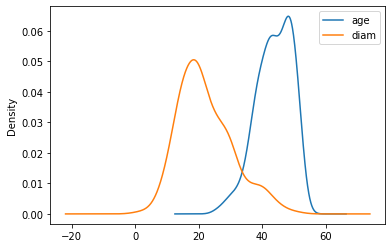

In [22]:
a=train[['age','diam']]
ax = a.plot.kde()

<AxesSubplot:ylabel='Density'>

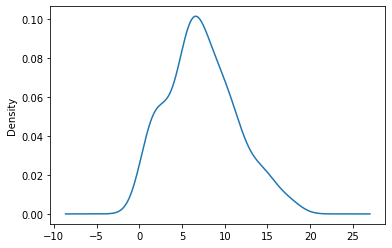

In [23]:
train['timerecurrence'].plot.kde()

<AxesSubplot:>

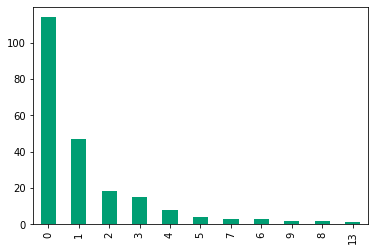

In [24]:
train['posnodes'].value_counts().plot.bar(color=u'#009E73')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

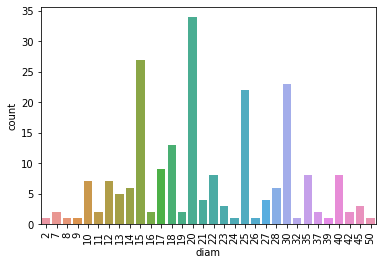

In [25]:
sns.countplot(train.diam)
plt.xticks(rotation=90)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

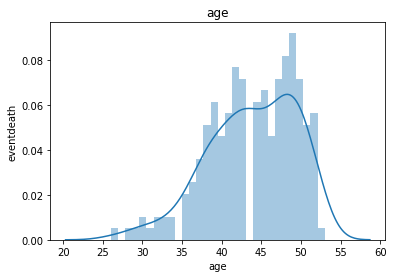

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

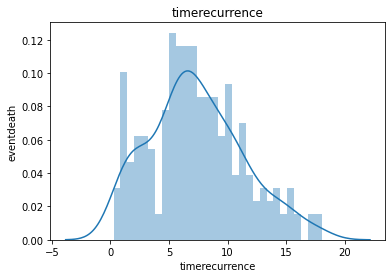

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

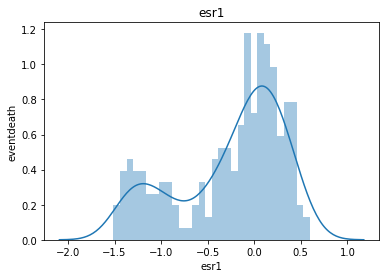

In [26]:
continuous_feature=train[['age','timerecurrence','esr1']] 

for feature in continuous_feature:
    data=train.copy()
#     data[feature].hist(bins=25)
    sns.distplot(data[feature], bins=30)
    plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
    plt.xlabel(feature)
    plt.ylabel("eventdeath")
    plt.title(feature)
    plt.show()

<IPython.core.display.Javascript object>

<Figure size 720x504 with 0 Axes>

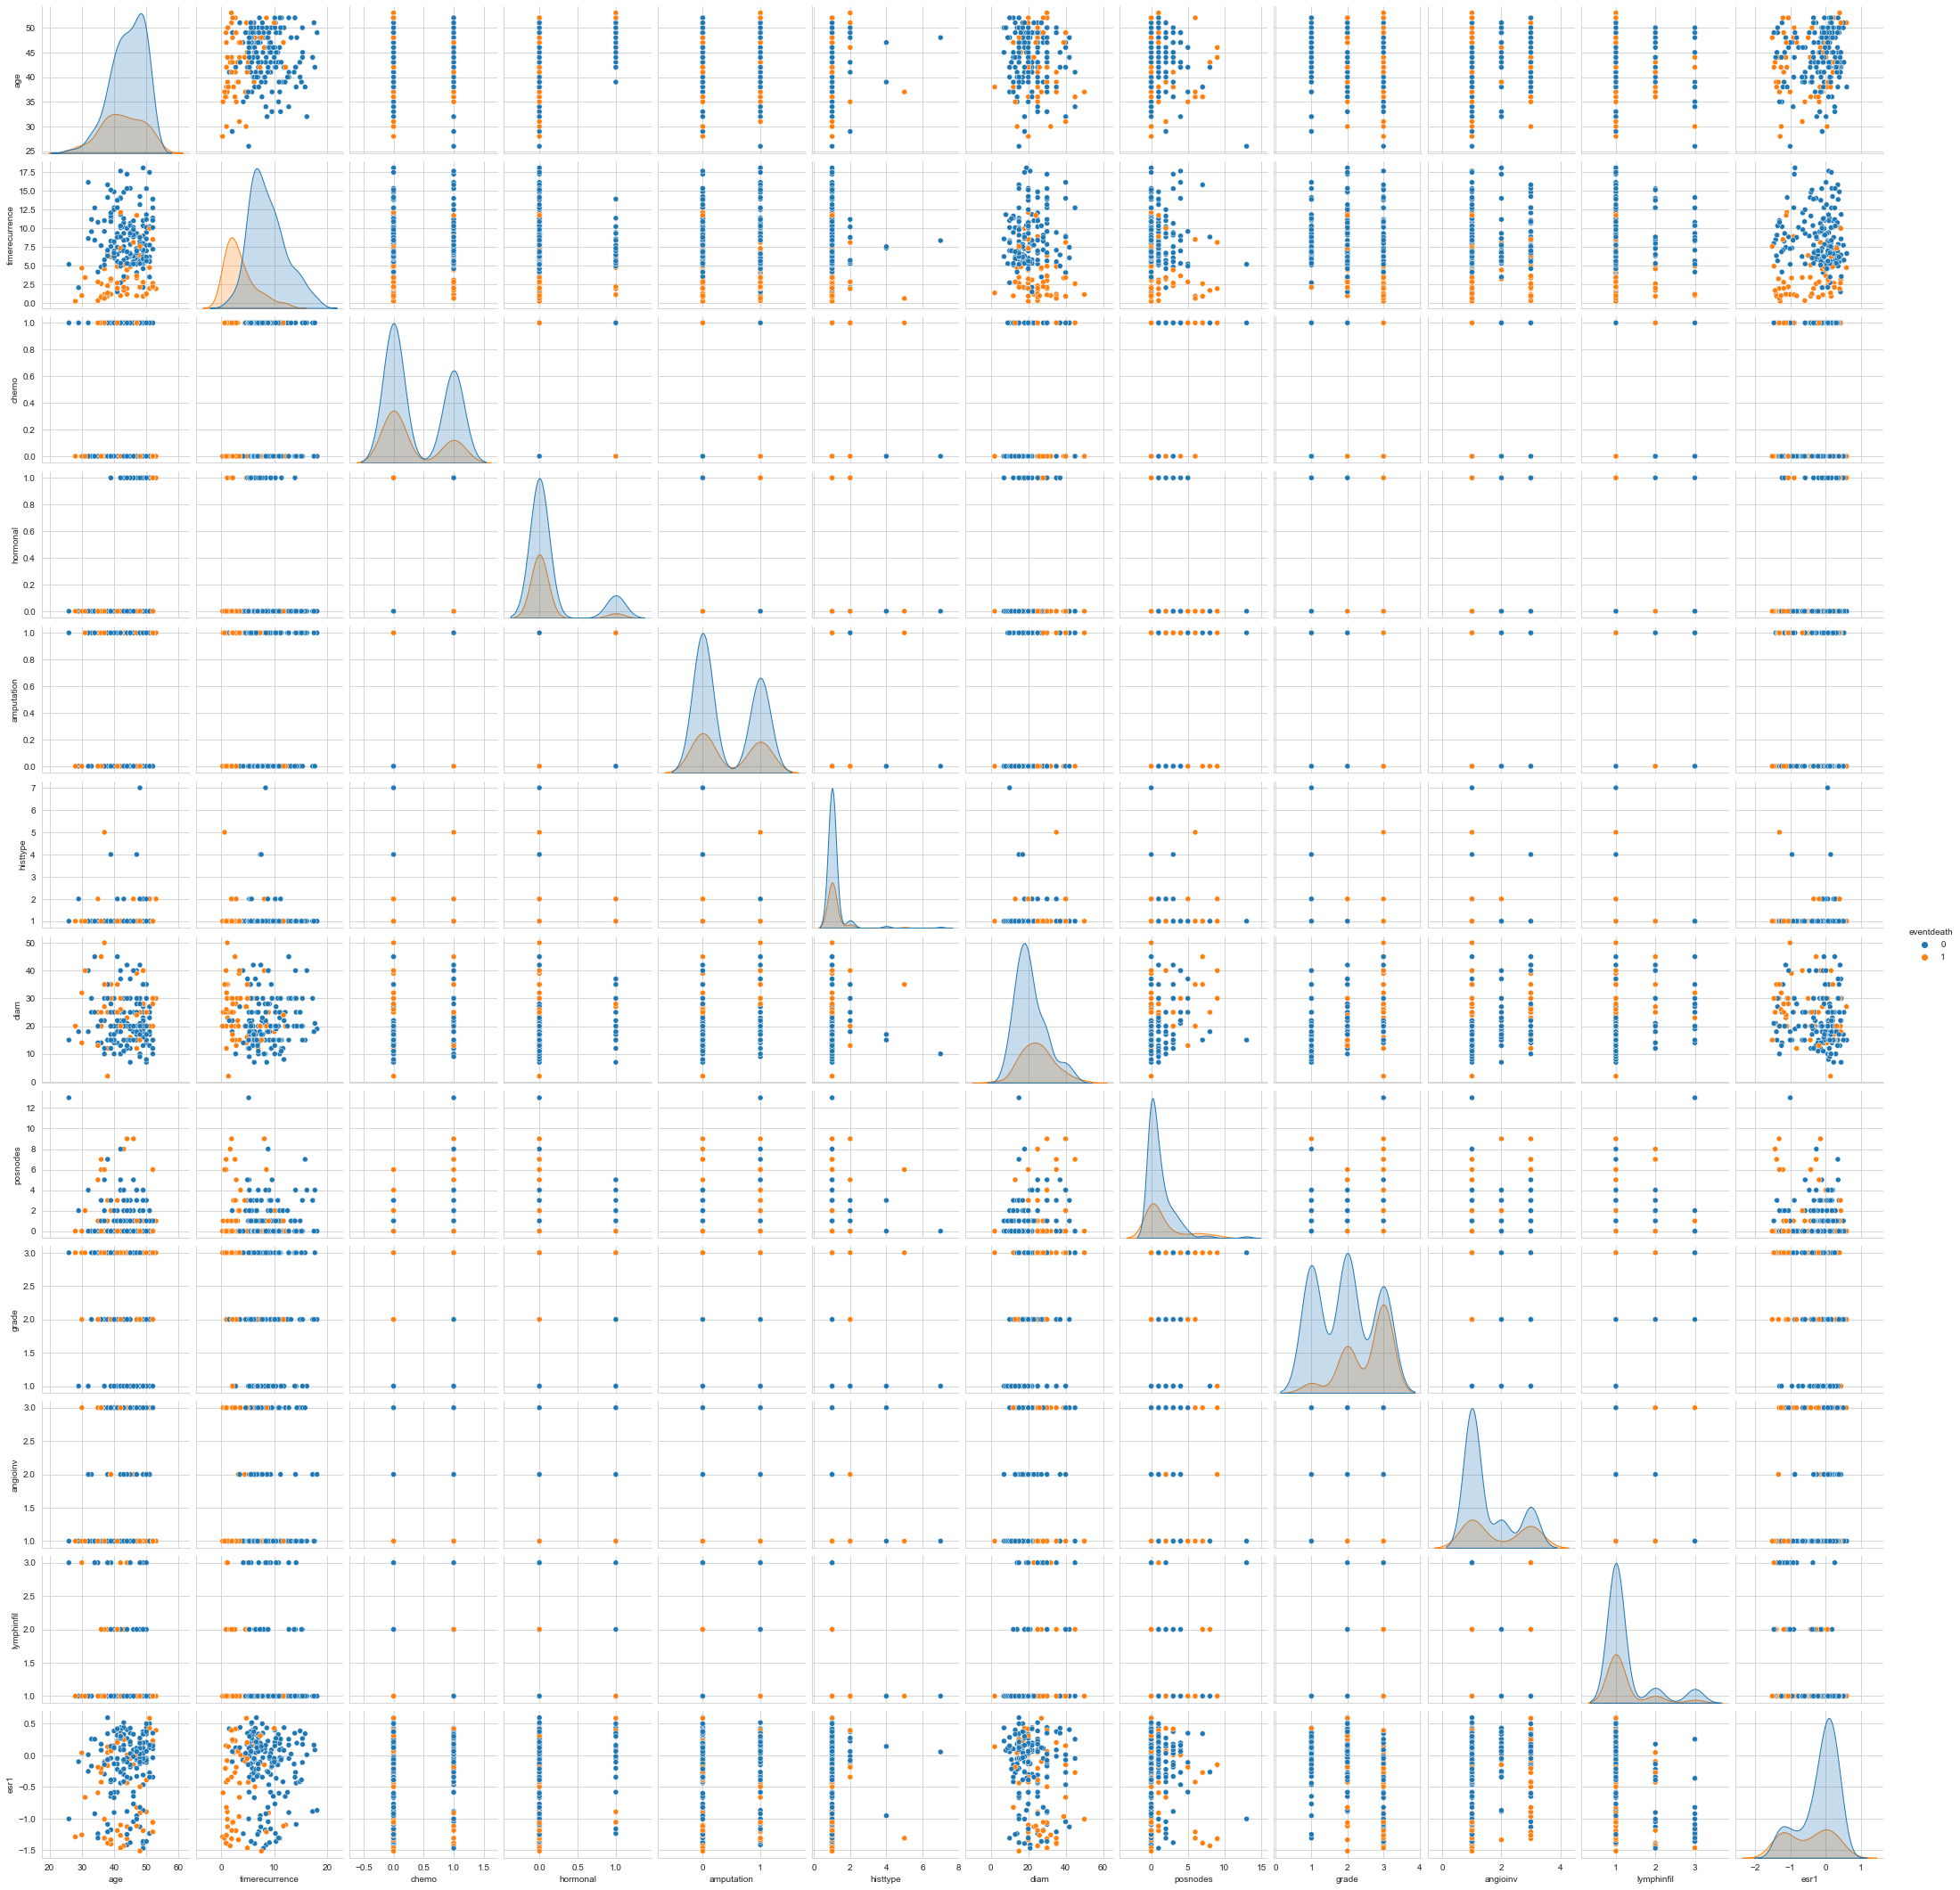

In [27]:
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
sns.pairplot(train, hue='eventdeath', diag_kind="kde")

## Correlation checking

In [28]:
train.corr()

,age,eventdeath,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,esr1
age,1.000000,-0.132598,0.105589,-0.040359,0.266118,0.053694,0.013295,-0.059353,-0.173319,-0.153711,0.043661,-0.240398,0.143214
eventdeath,-0.132598,1.000000,-0.578878,-0.086149,-0.097885,0.032163,0.006671,0.196618,0.101789,0.336147,0.183904,-0.025346,-0.260940
timerecurrence,0.105589,-0.578878,1.000000,0.019139,-0.069227,0.009359,-0.080059,-0.055553,-0.052411,-0.126845,-0.106776,0.020534,0.108915
chemo,-0.040359,-0.086149,0.019139,1.000000,0.067331,0.027181,-0.007159,0.073396,0.560127,-0.043060,0.128397,0.003581,0.012392
hormonal,0.266118,-0.097885,-0.069227,0.067331,1.000000,0.092646,-0.008378,0.052733,0.036351,-0.049295,-0.019359,-0.082503,0.127725
amputation,0.053694,0.032163,0.009359,0.027181,0.092646,1.000000,0.021587,0.262803,0.147983,0.040806,0.021817,-0.080861,0.088493
histtype,0.013295,0.006671,-0.080059,-0.007159,-0.008378,0.021587,1.000000,-0.016587,0.083012,-0.163997,-0.092744,-0.090995,0.003008
diam,-0.059353,0.196618,-0.055553,0.073396,0.052733,0.262803,-0.016587,1.000000,0.174543,0.354474,0.138899,0.195699,-0.190548
posnodes,-0.173319,0.101789,-0.052411,0.560127,0.036351,0.147983,0.083012,0.174543,1.000000,0.080675,0.159023,0.052053,-0.100974
grade,-0.153711,0.336147,-0.126845,-0.043060,-0.049295,0.040806,-0.163997,0.354474,0.080675,1.000000,0.139537,0.427256,-0.454554


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

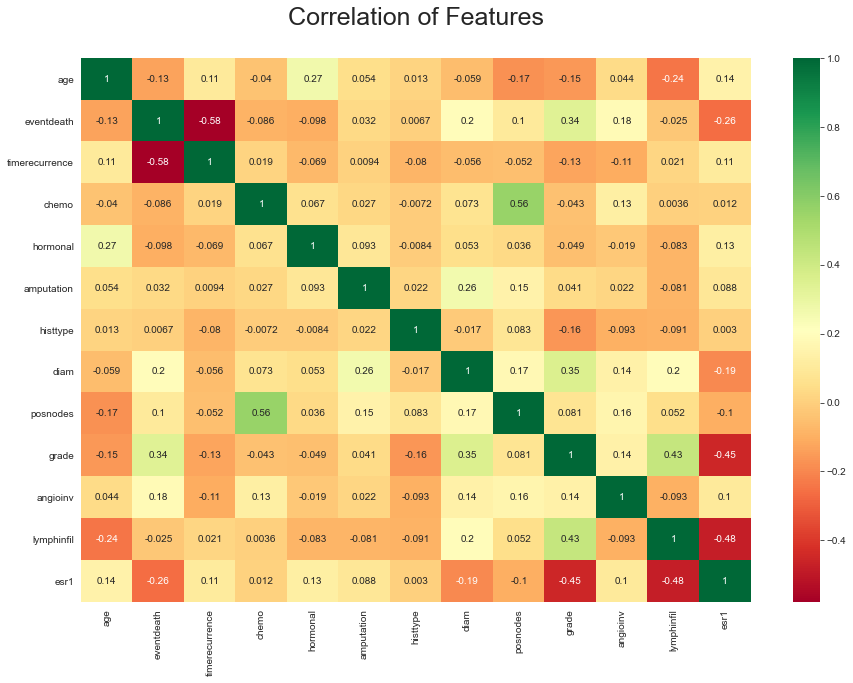

In [29]:

# Plotting heatmap to visualise correlation among features

sns.heatmap(train.corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title('Correlation of Features', y=1.05, size=25)
plt.show()

## Outliers checking

<AxesSubplot:>

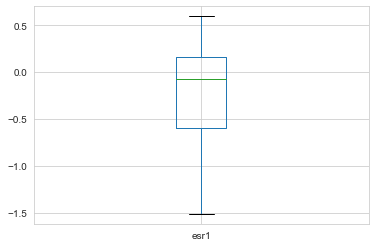

In [75]:
train.boxplot(column='esr1')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

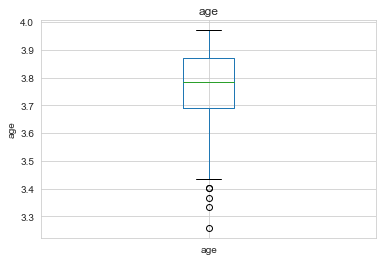

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

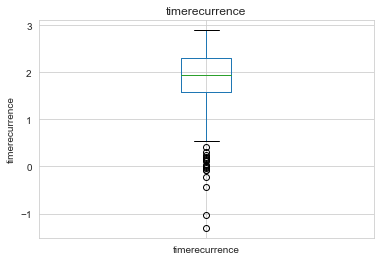

In [30]:
continuous_feature1=train[['age','timerecurrence']]
for feature in continuous_feature1:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [102]:
train['age'].describe()

count    217.000000
mean      43.834101
std        5.575254
min       26.000000
25%       40.000000
50%       44.000000
75%       48.000000
max       53.000000
Name: age, dtype: float64

In [161]:
test['age'].describe()

count    55.000000
mean     44.890909
std       4.961603
min      32.000000
25%      41.500000
50%      45.000000
75%      49.000000
max      52.000000
Name: age, dtype: float64

In [218]:
q1,q2,q3=np.quantile(test['age'], [0.25,0.5,0.75])

iqr=q3-q1

In [219]:
print('age - lower boundary', q1-(1.5*iqr))
print('age - upper_boundary', q3+(1.5*iqr))

age - lower boundary 30.25
age - upper_boundary 60.25


In [220]:
# train.loc[(train['age'] < 30) ,'age'] ='30'

train.loc[(train['age'] < 30), 'age'] = 30
train.loc[(train['age'] > 60), 'age'] = 60

In [221]:
train['timerecurrence'].describe()

count    217.000000
mean       7.327901
std        3.994658
min        0.271047
25%        4.892539
50%        6.995209
75%        9.998631
max       18.080767
Name: timerecurrence, dtype: float64

In [222]:
q11,q12,q13=np.quantile(test['timerecurrence'], [0.25,0.5,0.75])

iqr=q13-q11
iqr

7.587953499999999

In [223]:
print('timerecurrence - lower boundary', q11-(1.5*iqr))
print('timerecurrence - upper_boundary', q13+(1.5*iqr))

timerecurrence - lower boundary -9.19575625
timerecurrence - upper_boundary 21.15605775


In [224]:
train.loc[(train['timerecurrence']<-9),'timerecurrence']=-9
train.loc[(train['timerecurrence']>21),'timerecurrence']=21

In [225]:
train['age'].describe()

count    217.000000
mean      43.866359
std        5.485302
min       30.000000
25%       40.000000
50%       44.000000
75%       48.000000
max       53.000000
Name: age, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

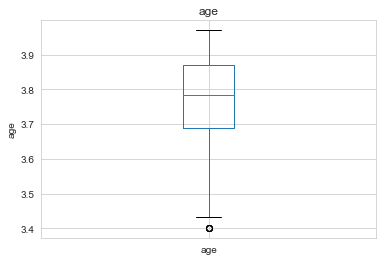

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

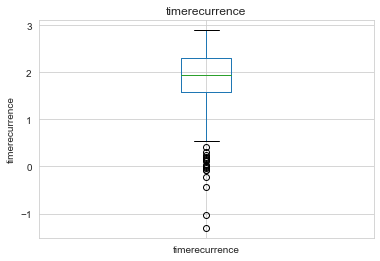

In [226]:
continuous_feature1=train[['age','timerecurrence']]
for feature in continuous_feature1:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Feature Selection

In [230]:
X_train1=train.drop(['esr1','Patient'],axis=1)

In [231]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=10)
ordered_feature=ordered_rank_features.fit(X_train1,y_train)

In [232]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X_train1.columns)

In [233]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [234]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,age,2.683762
1,eventdeath,158.000000
2,timerecurrence,157.618364
3,chemo,1.009333
4,hormonal,1.830063
5,amputation,0.131379
6,histtype,0.003089
7,diam,27.731675
8,posnodes,7.353008
9,grade,7.327099


## Splitting the dataset

In [280]:
X_train=train.drop (['eventdeath','Patient'],axis=1)
X_test=test.drop (['Patient'],axis=1)
y_train = train['eventdeath']

In [236]:
print('x_train', X_train.shape,'x_test', X_test.shape, 'y_train', y_train.shape)

x_train (217, 12) x_test (55, 12) y_train (217,)


## Feature Scaling

In [281]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

## Modeling

In [282]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model = model.fit(X_train, y_train)

print ('Logistic Regression:')
print ('\n'"Accuracy :", metrics.accuracy_score(y_train, model.predict(X_train)))

Logistic Regression:

Accuracy : 0.880184331797235


In [283]:
y_predt=model.predict(X_test)
y_predt

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [286]:
from sklearn import metrics

# generate evaluation metrics

print ("Accuracy :", metrics.accuracy_score(y_predt, model.predict(X_test)))
print ("Confusion matrix :",metrics.confusion_matrix(y_predt, model.predict(X_test)))
print ("classification report :", metrics.classification_report(y_predt, model.predict(X_test)))

Accuracy : 1.0
Confusion matrix : [[36  0]
 [ 0 19]]
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        19

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



## Evaluation and comparison of all the models

In [287]:

# Logistic Regression


logreg= LogisticRegression(solver='lbfgs')

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)


# Gradient Boosting Classifier


GB = GradientBoostingClassifier()

GB.fit(X_train, y_train)

y_pred_GB = GB.predict(X_test)



# Random Forest Classifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


# Decision Tree Classifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


# KNeighbors Classifier


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)


# XGB Classifier

XGB = XGBClassifier() 

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)



# Support Vector classifier

svc = SVC(probability=True)

svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_test)

In [288]:
models = []

Z = [SVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,XGBClassifier(),
    RandomForestClassifier() , GradientBoostingClassifier()]


X = ["SVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" , "XGB",
    "RandomForestClassifier" , "GradientBoostingClassifier"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    models.append(accuracy_score(pred , y_predt))   

In [289]:
d = { "Accuracy" : models , "Algorithm" : X }
data_frame = pd.DataFrame(d)
data_frame

,Accuracy,Algorithm
0,0.945455,SVC
1,0.927273,DecisionTreeClassifier
2,1.000000,LogisticRegression
3,0.763636,KNeighborsClassifier
4,0.909091,XGB
5,0.909091,RandomForestClassifier
6,0.909091,GradientBoostingClassifier


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Accuracy of all Algorithms')

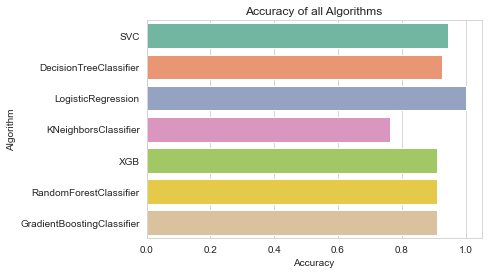

In [290]:
sns.barplot(data_frame['Accuracy'],data_frame['Algorithm'],palette= "Set2").set_title('Accuracy of all Algorithms')

## Hyperparameter Tuning

In [294]:
Parameter_grid=dict(criterion=['entropy', 'gini'], max_depth=[1,3,5,7], n_estimators=[100,200,300,400])
Parameter_dist=dict(criterion=['entropy', 'gini'], max_depth=np.arange(1,15,2), n_estimators=np.arange(100,1500,100))

In [295]:
gs=GridSearchCV(estimator=rf, param_grid=Parameter_grid, cv=5, scoring='accuracy', verbose=10)

In [296]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.773, total=   0.4s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.795, total=   0.3s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.767, total=   0.4s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.791, total=   0.4s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.791, total=   0.3s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.727, total=   0.7s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.4s remaining:    0.0s


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.773, total=   0.7s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.1s remaining:    0.0s


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.767, total=   0.6s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.8s remaining:    0.0s


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.744, total=   0.7s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.5s remaining:    0.0s


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.767, total=   0.7s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.818, total=   1.0s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.818, total=   1.0s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.767, total=   1.0s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.721, total=   1.1s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.767, total=   1.2s
[CV] criterion=entropy, max_depth=1, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=1, n_estimators=400, score=0.864, total= 

[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.860, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.907, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.886, total=   0.7s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.818, total=   0.7s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.884, total=   0.7s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.884, total=   0.7s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.884, total= 

[CV]  criterion=gini, max_depth=3, n_estimators=400, score=0.860, total=   1.3s
[CV] criterion=gini, max_depth=3, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=3, n_estimators=400, score=0.884, total=   1.4s
[CV] criterion=gini, max_depth=3, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=3, n_estimators=400, score=0.907, total=   1.6s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.864, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.841, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.860, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.884, total=   0.3s
[CV] criterion

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  2.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy', verbose=10)

In [297]:
gs.score(X_train, y_train)

0.9124423963133641

In [298]:
print(accuracy_score(y_train, gs.predict(X_train)))


print(classification_report(y_train, gs.predict(X_train)))

print(' - confusion train matrix - ')

print(confusion_matrix(y_train, gs.predict(X_train)))


0.9124423963133641
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       158
           1       0.95      0.71      0.82        59

    accuracy                           0.91       217
   macro avg       0.93      0.85      0.88       217
weighted avg       0.92      0.91      0.91       217

 - confusion train matrix - 
[[156   2]
 [ 17  42]]


In [299]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}

In [300]:
rs=RandomizedSearchCV(estimator=rf, param_distributions=Parameter_dist, cv=5, scoring='accuracy', verbose=10)

In [301]:
rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, max_depth=7, criterion=entropy ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, max_depth=7, criterion=entropy, score=0.886, total=   1.0s
[CV] n_estimators=300, max_depth=7, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=300, max_depth=7, criterion=entropy, score=0.818, total=   1.1s
[CV] n_estimators=300, max_depth=7, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=300, max_depth=7, criterion=entropy, score=0.860, total=   1.1s
[CV] n_estimators=300, max_depth=7, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.1s remaining:    0.0s


[CV]  n_estimators=300, max_depth=7, criterion=entropy, score=0.884, total=   1.1s
[CV] n_estimators=300, max_depth=7, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.2s remaining:    0.0s


[CV]  n_estimators=300, max_depth=7, criterion=entropy, score=0.860, total=   1.0s
[CV] n_estimators=1000, max_depth=3, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.2s remaining:    0.0s


[CV]  n_estimators=1000, max_depth=3, criterion=gini, score=0.886, total=   3.3s
[CV] n_estimators=1000, max_depth=3, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.5s remaining:    0.0s


[CV]  n_estimators=1000, max_depth=3, criterion=gini, score=0.841, total=   3.2s
[CV] n_estimators=1000, max_depth=3, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.8s remaining:    0.0s


[CV]  n_estimators=1000, max_depth=3, criterion=gini, score=0.860, total=   3.5s
[CV] n_estimators=1000, max_depth=3, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.3s remaining:    0.0s


[CV]  n_estimators=1000, max_depth=3, criterion=gini, score=0.884, total=   3.5s
[CV] n_estimators=1000, max_depth=3, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   18.8s remaining:    0.0s


[CV]  n_estimators=1000, max_depth=3, criterion=gini, score=0.884, total=   3.6s
[CV] n_estimators=100, max_depth=7, criterion=gini ...................
[CV]  n_estimators=100, max_depth=7, criterion=gini, score=0.864, total=   0.4s
[CV] n_estimators=100, max_depth=7, criterion=gini ...................
[CV]  n_estimators=100, max_depth=7, criterion=gini, score=0.841, total=   0.4s
[CV] n_estimators=100, max_depth=7, criterion=gini ...................
[CV]  n_estimators=100, max_depth=7, criterion=gini, score=0.860, total=   0.4s
[CV] n_estimators=100, max_depth=7, criterion=gini ...................
[CV]  n_estimators=100, max_depth=7, criterion=gini, score=0.884, total=   0.4s
[CV] n_estimators=100, max_depth=7, criterion=gini ...................
[CV]  n_estimators=100, max_depth=7, criterion=gini, score=0.884, total=   0.4s
[CV] n_estimators=1200, max_depth=1, criterion=gini ..................
[CV]  n_estimators=1200, max_depth=1, criterion=gini, score=0.818, total=   3.8s
[CV] n_estim

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 1,  3,  5,  7,  9, 11, 13]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400])},
                   scoring='accuracy', verbose=10)

In [302]:
rs.score(X_train, y_train)

1.0

In [303]:
rs.best_params_

{'n_estimators': 1100, 'max_depth': 11, 'criterion': 'gini'}

In [304]:
predictions=rs.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [305]:
submission = pd.DataFrame({
        "Patient": test["Patient"],
        "eventdeath": predictions
    })
submission.to_csv('submission-cancer-death.csv', index=False)
submission.head(5)

,Patient,eventdeath
0,s154,0
1,s260,0
2,s209,0
3,s272,0
4,s354,0


In [306]:
submission['eventdeath'].value_counts()

0    35
1    20
Name: eventdeath, dtype: int64